# Data uploading
This piece of code uploads a data file to the google collab program and creates a dataframe from the data.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data_1M.csv to Data_1M.csv


In [0]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['Data_1M.csv']),header =None)

# Sample Preparation

The following code creates data samples from the input data stored in the df dataframe object.

Each sample is a 2-tuple with the input and respective output sequences.

The input is a 3*149 matrix with the start time in the 1st column and the segment travel time in the rest



In [4]:
from numpy import array
from numpy import hstack


# Split a Multivariate sequence into samples

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
dataset=df2.as_matrix()

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# Extract the number of features from the dataset
n_features = X.shape[2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# CNN construction

The Code below creates a CNN with the following features for multi-variable time series forecasting:



* 1D convolutional layer
* Filters x64
* Kernel size -2
* Maxpooling layer with size-2
* Fully connected layer
* ReLu activation function
* Adam optimizer
* MSE loss function






In [5]:
# Multivariate CNN for Bus travel time prediction

from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# Split a multivariate sequence into samples

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
dataset=df2.as_matrix()

# Define a CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# Fit the defined model
history=model.fit(X, y, epochs=3000, verbose=1)

model.evaluate(X,y)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 1/3000
424/424 [==============================] - 5s 12ms/step - loss: 15764945.3019
Epoch 2/3000
424/424 [==============================] - 0s 119us/step - loss: 12688094.9623
Epoch 3/3000
424/424 [==============================] - 0s 111us/step - loss: 8718938.5472
Epoch 4/3000
424/424 [==============================] - 0s 118us/step - loss: 4200138.6557
Epoch 5/3000
424/424 [==============================] - 0s 118us/step - loss: 2193355.6981
Epoch 6/3000
424/424 [==============================] - 0s 120us/step - loss: 2116298.7500
Epoch 7/3000
424/424 [==============================] - 0s 121us/step - loss: 1946353.5943
Epoch 8/3000
424/424 [==============================] - 0s 124us/step - loss: 1896912.6934
Epoch 9/3000
424/424 [==============================] - 0s 118us/step - loss: 1824268.5236
Epoch 10/3000
424/424 [==============================] - 0s 117us/step - loss: 1743614.7264
Epoch 11/3000
424/424 [==============================] - 0s 121us/step - loss: 1677195.3

3170.1895452535377

#Plotting the training Loss
The following code plots the loss function w.r.t the training epoch.

dict_keys(['loss'])


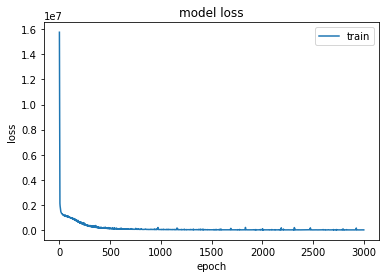

In [7]:
import matplotlib.pyplot as plt
import numpy


print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [0]:
# demonstrate prediction
x_input = X[1]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 3.5452359e+04  6.8390892e+01  2.3359877e+01  4.0911678e+01
   6.2924614e+01  7.5360161e+01  2.6152941e+01  3.1185490e+01
   9.5944748e+00  9.3496637e+00  1.7593924e+01  3.2565365e+01
   9.0527534e+00  1.7303539e+01  2.7086130e+01  2.1511177e+01
   3.5273361e+01  1.6034349e+01  1.4654993e+01  1.2338235e+01
   1.8950228e+01  1.2052539e+01  7.5237646e+00  2.0566317e+01
   2.1711411e+01  1.5949043e+01  1.4989230e+01  1.6331848e+01
   2.8360416e+01  2.6526245e+01  1.6632887e+01  1.8243231e+01
   3.1357416e+01  1.9580851e+01  7.2035775e+00  3.3491768e+01
   5.1046490e+01  1.0840377e+01  1.7838469e+01  3.1784559e+01
   5.0863419e+00  3.8047459e+01  3.4528290e+01  1.5852843e+01
   1.2393447e+01 -6.0118704e+00  4.2127506e+01  2.0268415e+01
   2.1297539e+01  2.2677513e+01  1.0776228e+01  1.3462677e+01
   2.0586281e+01  1.1833576e+01  3.1369055e+01  1.2453238e+01
   1.3480588e+01  3.2741051e+01  3.4451515e+01  1.3247310e+01
   1.7263090e+01  2.3737057e+01  3.5529385e+01  7.7090678e+00
   1.211